In [198]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [207]:
list_of_base_atk_speed = [round(i,2) for i in np.arange(.5, 1.05, .05)]
list_of_bonus_atk_speed_percentage = [i for i in np.arange(0, 210, 10)]
#
base_as = .6
bonus_as = 0

In [208]:
rfc_times = [1/(base_as * (1+ (55 + bonus_as)/100))*i for i in np.arange(1,41)]
guinsoo_times = [1/(base_as * (1+ (10 + bonus_as)/100))]
for i in np.arange(1,40):
    guinsoo_times.append(guinsoo_times[i-1] + 1/(base_as * (1+ (10 + bonus_as + i*6)/100)))
index=0
while rfc_times[index] < guinsoo_times[index]:
    index = index + 1


In [234]:
time = list(zip(np.arange(1,41), guinsoo_times, rfc_times))
pd.DataFrame(time, columns=['auto count', 'guinsoo', 'rfc'])


,auto count,guinsoo,rfc
0,1,1.515152,1.075269
1,2,2.951933,2.150538
2,3,4.318053,3.225806
3,4,5.620137,4.301075
4,5,6.863918,5.376344
5,6,8.054394,6.451613
6,7,9.195946,7.526882
7,8,10.292438,8.602151
8,9,11.347290,9.677419
9,10,12.363550,10.752688


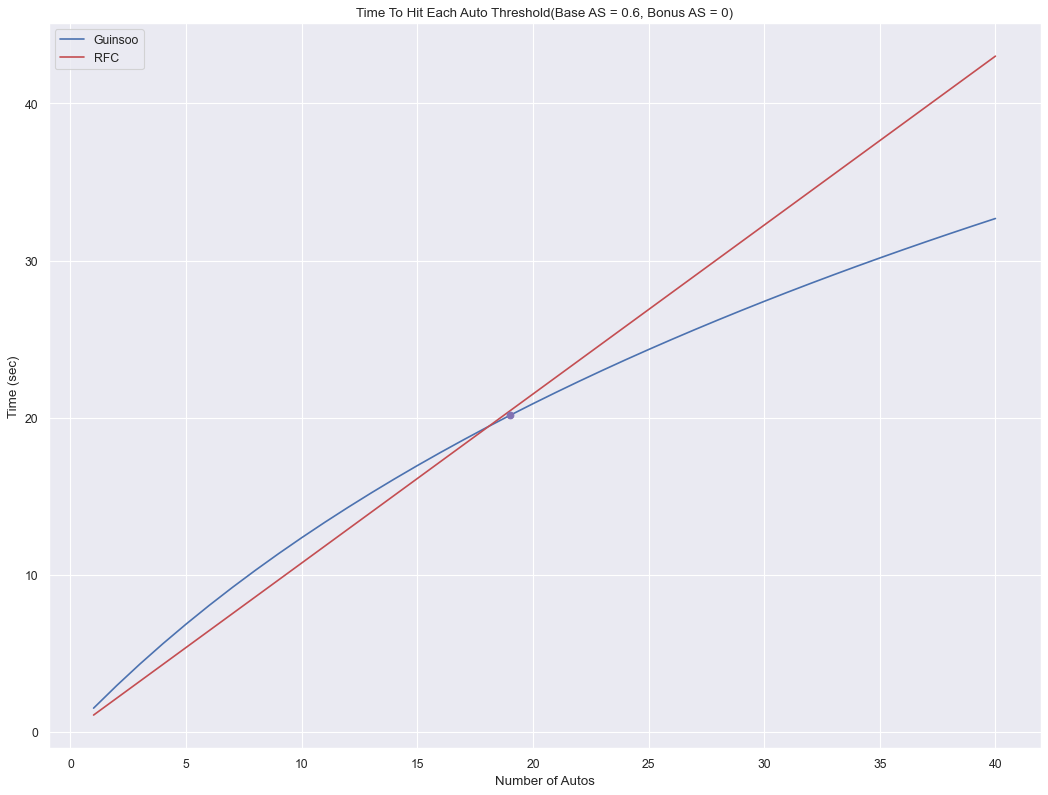

In [201]:

plt.figure(figsize=(16, 12), dpi=80)
plt.plot(np.arange(1,41), guinsoo_times, label='Guinsoo', color='b')
plt.plot(np.arange(1,41), rfc_times, label='RFC', color='r')
plt.plot(index+1, guinsoo_times[index], color='m', marker='o')
plt.legend(loc='upper left')
plt.xlabel("Number of Autos")
plt.ylabel("Time (sec)")
plt.title("Time To Hit Each Auto Threshold(Base AS = 0.6, Bonus AS = 0)")
plt.show()


In [235]:
break_even_times = []
for base in list_of_base_atk_speed:
    collection_of_time = []
    for bonus in list_of_bonus_atk_speed_percentage:
        rfc_times = [1/(base * (1+ (55 + bonus)/100))*i for i in np.arange(1,41)]
        guinsoo_times = [1/(base * (1+ (10 + bonus)/100))]
        for i in np.arange(1,40):
            guinsoo_times.append(guinsoo_times[i-1] + 1/(base * (1+ (10 + bonus + i*6)/100)))
        index=0
        while rfc_times[index] < guinsoo_times[index]:
            index = index + 1
        collection_of_time.append(round(guinsoo_times[index], 2))
    break_even_times.append(collection_of_time)

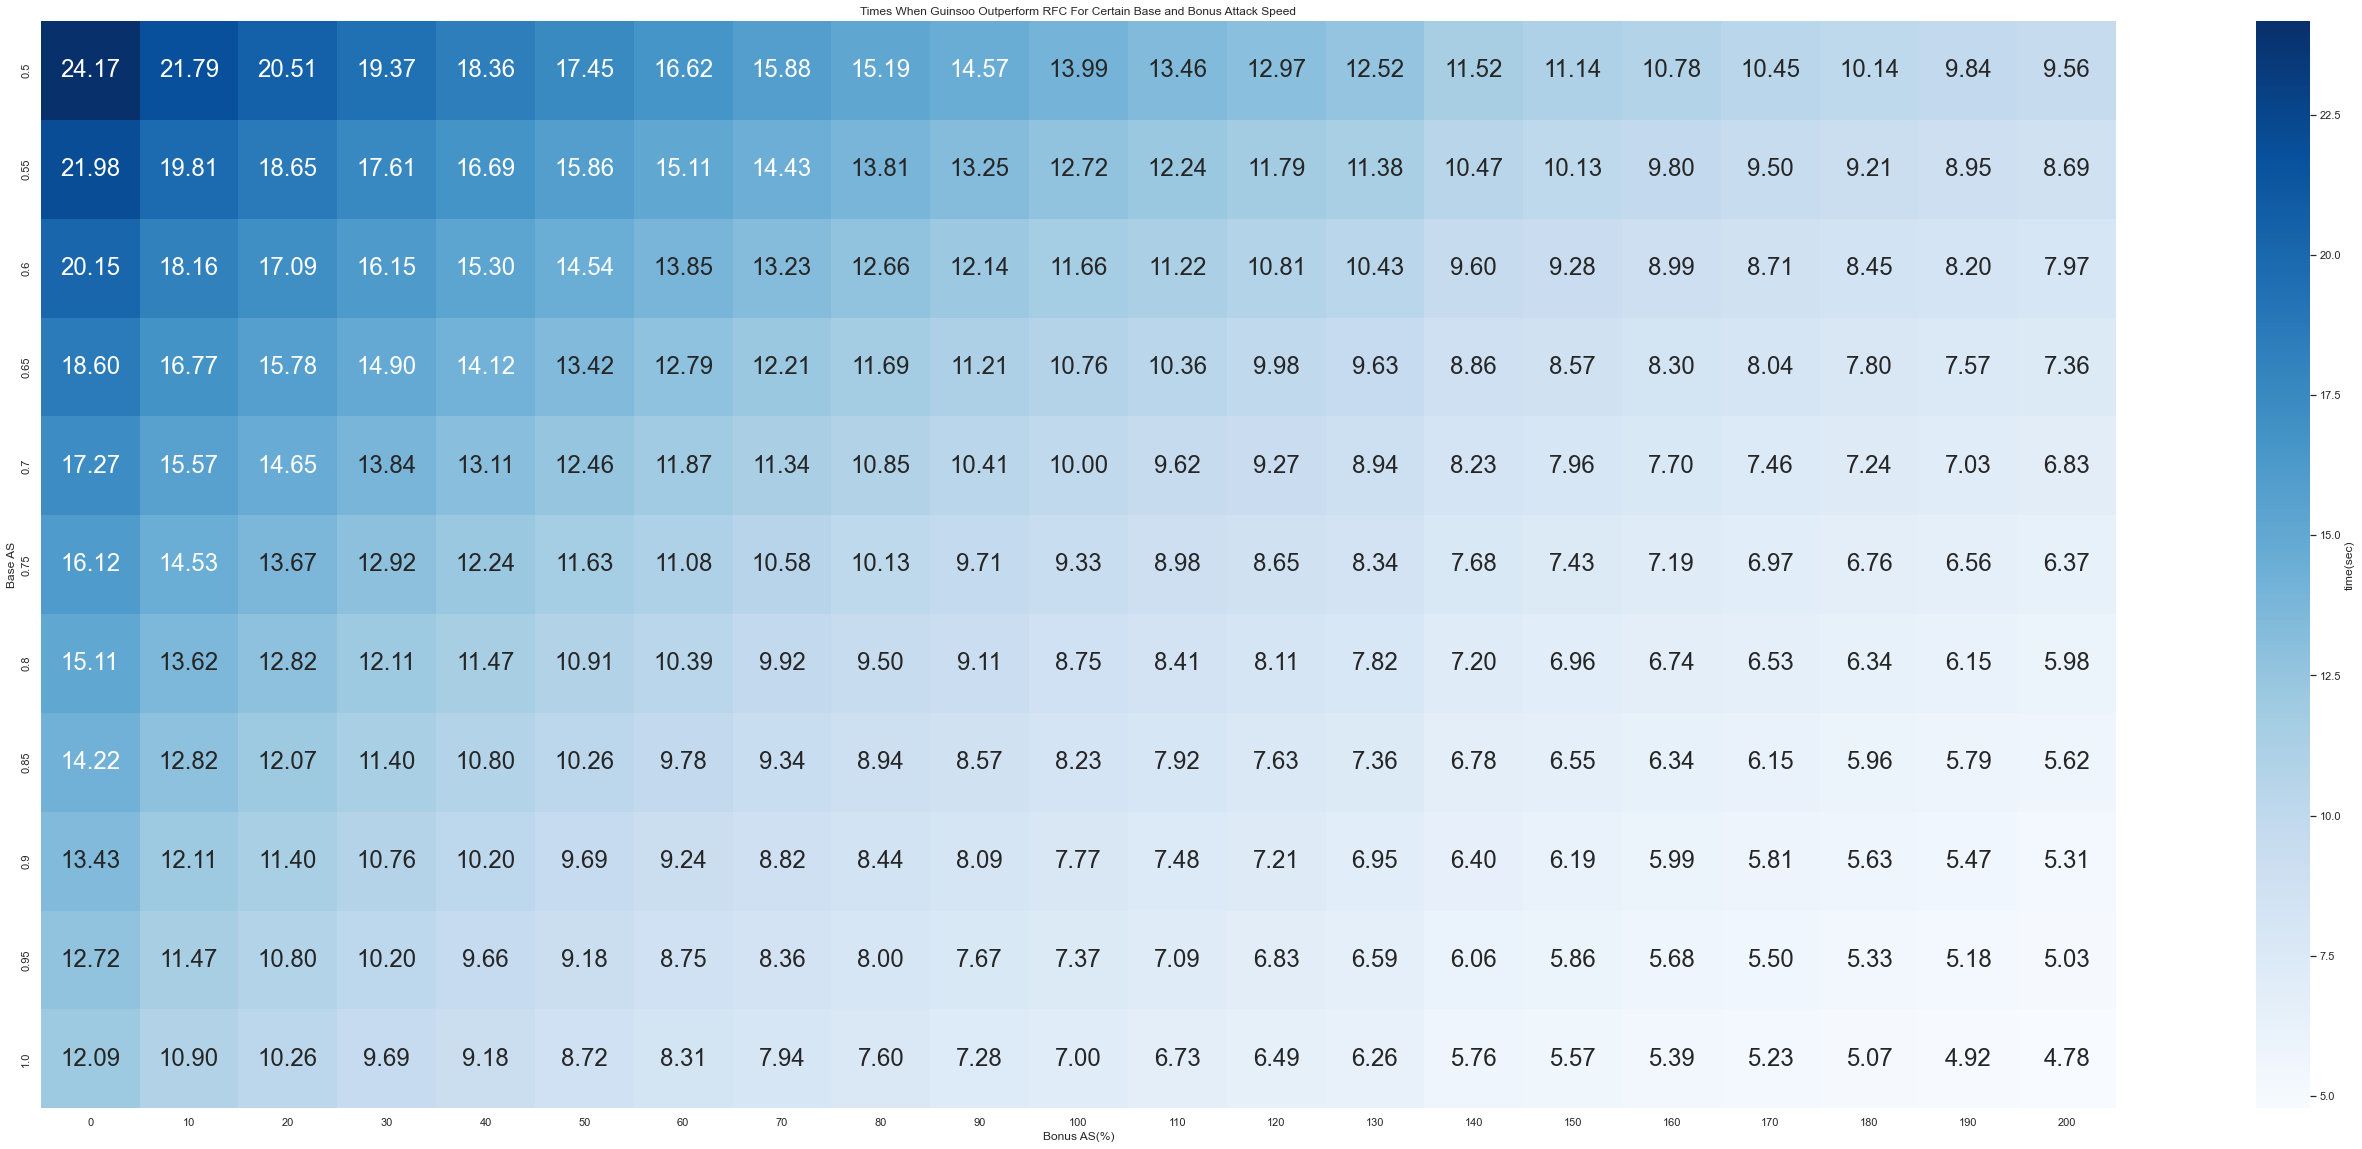

In [249]:
chart = pd.DataFrame(break_even_times, index=list_of_base_atk_speed, columns=list_of_bonus_atk_speed_percentage)
data = sns.heatmap(chart, cmap='Blues', annot=chart, square = True, fmt='.2f', cbar_kws={'label': 'time(sec)'}, annot_kws={"size":24})
data.set(xlabel='Bonus AS(%)', ylabel='Base AS', title='Times When Guinsoo Outperform RFC For Certain Base and Bonus Attack Speed')
sns.set(rc={'figure.figsize':(50,20)})